In [3]:
!pip install git+https://github.com/openai/swarm.git
!pip install openai
!pip install firecrawl-py

  Cloning https://github.com/openai/swarm.git to /tmp/pip-req-build-we93a6jb
  Running command git clone --filter=blob:none --quiet https://github.com/openai/swarm.git /tmp/pip-req-build-we93a6jb
  Resolved https://github.com/openai/swarm.git to commit 9db581cecaacea0d46a933d6453c312b034dbf47
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.7/218.7 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 30.0 MB/s eta 0:00:00
  Created wheel for swarm: filename=swarm-0.1.0-py3-none-any.whl size=25999 sha256=965de2633a9d

In [4]:
import os
from firecrawl import FirecrawlApp
from swarm import Agent, Swarm
from openai import OpenAI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from openai import ChatCompletion

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:172: UserWarning: Field name "schema" in "FirecrawlApp.ExtractParams" shadows an attribute in parent "BaseModel"
  warnings.warn(


In [46]:
# Configure API Keys

os.environ["OPENAI_API_KEY"]= ""

#Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/jaydiaz2012/AI_First_Day_6_AI_Swarm/refs/heads/main/ai%20first%20sales%20data%20-%20sales_final(web).csv")

# Analyze dataset
def analyze_dataset():
    df['date'] = pd.to_datetime(df['date'])
    numerical_df = df.select_dtypes(include=np.number)

    summary = {
        "overview": df.describe(include="all").to_dict(),
        "null_values": df.isnull().sum().to_dict(),
        "correlations": numerical_df.corr().to_dict(),
    }
    return summary

def generate_web_insights():
    web_insights = {
        'source_pageviews': df.groupby('source')['pageviews'].sum(),
        'source_visits': df.groupby('source')['visits'].sum(),
        'source_transactions': df.groupby('source')['revenue'].sum(),
        'source_product_click': df.groupby('source')['ad spend'].sum()
    }
    return web_insights

def generate_web_visuals():
    visualizations = {}

    # Page Views Distribution
    plt.figure(figsize=(10, 6))
    sns.lineplot(df, x="source", y="pageviews")
    plt.title("Page Views Distribution")
    visualizations['page_views_distribution'] = plt.gcf()
    plt.close()

    # Visits Distribution
    plt.figure(figsize=(10, 6))
    sns.lineplot(df, x="source", y="visits")
    plt.title("Visits Distribution")
    visualizations['visits_distribution'] = plt.gcf()
    plt.close()

    # Transactions Trends
    plt.figure(figsize=(10, 6))
    sns.lineplot(df, x="source", y="transactions")
    plt.title("Transactions Trends")
    visualizations['transactions_trends'] = plt.gcf()
    plt.close()

    # Product Click Trends
    plt.figure(figsize=(10, 6))
    sns.lineplot(df, x="source", y="productClick")
    plt.title("Product Clicks Trends")
    visualizations['product_click_trends'] = plt.gcf()
    plt.close()

    return visualizations

web_analytics_agent = Agent(
    name="Web Analyst Agent",
    model="gpt-4o-mini",
    instructions="""You are a web analyst agent that cleans the dataset and report on the statistical summary of the dataset""",
    functions=[analyze_dataset],
)

web_insights_agent = Agent(
    name="Web Insights Agent",
    model="gpt-4o-mini",
    instructions="""You are a Web Insights Agent that provide insights about the data provided and summarize the insights from other agents, including actionable recommendations""",
    functions=[generate_web_insights]
)

web_insights_visuals_agent = Agent(
    name="Web_Visuals_Agent",
    model="gpt-4o-mini",
    instructions="""You are a data visualization expert that create visualizations on a given datase and gives summary of the data visuals""",
    fuctions=[generate_web_visuals]
)

if __name__ == "__main__":
    client = Swarm()

    web_analytics_response = client.run(
        agent=web_analytics_agent,
        messages=[{
            "role": "user",
            "content": "Please clean and analyze my dataset."
        }]
    )

    print("\nWeb Analytics Results:")
    print(web_analytics_response.messages[-1]["content"])

    web_insights_response = client.run(
        agent=web_insights_agent,
        messages=[{
            "role": "user",
            "content": "Please provide insights based from my dataset."
        }]
    )

    print("\nWeb Insights Results:")
    print(web_insights_response.messages[-1]["content"])

    web_insights_visuals_response = client.run(
        agent=web_insights_visuals_agent,
        messages=[{
            "role": "user",
            "content": "Please provide charts using Seaborn or Matplotlib using the data from the given dataset."
        }]
    )

    print("\nWeb Analytics Visuals Results:")
    print(web_insights_visuals_response.messages[-1]["content"])


Web Analytics Results:
Here is the statistical summary and analysis of your dataset:

### Overview of the Dataset

- **Total Records**: 52,721

#### Date
- **Mean**: May 19, 2020
- **Min**: January 1, 2020
- **Max**: September 30, 2020

#### Sources
- **Unique**: 22
- **Most Frequent Source**: Facebook (12,954 occurrences)

#### Medium
- **Unique**: 6
- **Most Frequent Medium**: CPC (16,833 occurrences)

#### Delivery Available
- **Unique**: 3
- **Most Frequent**: No Data (31,953 occurrences)

#### Device Type
- **Unique**: 3
- **Most Frequent Device**: Mobile (24,416 occurrences)

#### Promo Activated
- **Unique**: 2
- **Most Frequent**: No (27,548 occurrences)

#### Filter Used
- **Unique**: 2
- **Most Frequent**: No (37,290 occurrences)

### Numerical Metrics

#### Pageviews
- **Mean**: 583.76
- **Min**: 0
- **Max**: 34,832
- **Standard Deviation**: 1,452.00

#### Visits
- **Mean**: 127.12
- **Min**: 1
- **Max**: 6,975
- **Standard Deviation**: 384.87

#### Product Clicks
- **Mean*

<ipython-input-39-5dc1ef903e8a>:69: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_metrics = self.raw_data.groupby(pd.Grouper(key='date', freq='M')).agg({



       WEB ANALYTICS COMPREHENSIVE REPORT
       Generated on: 2024-12-04 13:34:59
       
       1. TIME SERIES TRENDS
       ---------------------
       Pageviews Trend: increasing 
       (Significance: not significant)
       
       2. TRAFFIC SOURCE ANALYSIS
       --------------------------
       Top Traffic Sources:
       google, facebook, (direct)
       
       Best Converting Source: (direct)
       
       RECOMMENDATIONS
       ---------------
       1. Focus marketing efforts on (direct)
       2. Investigate strategies to improve increasing trend
       


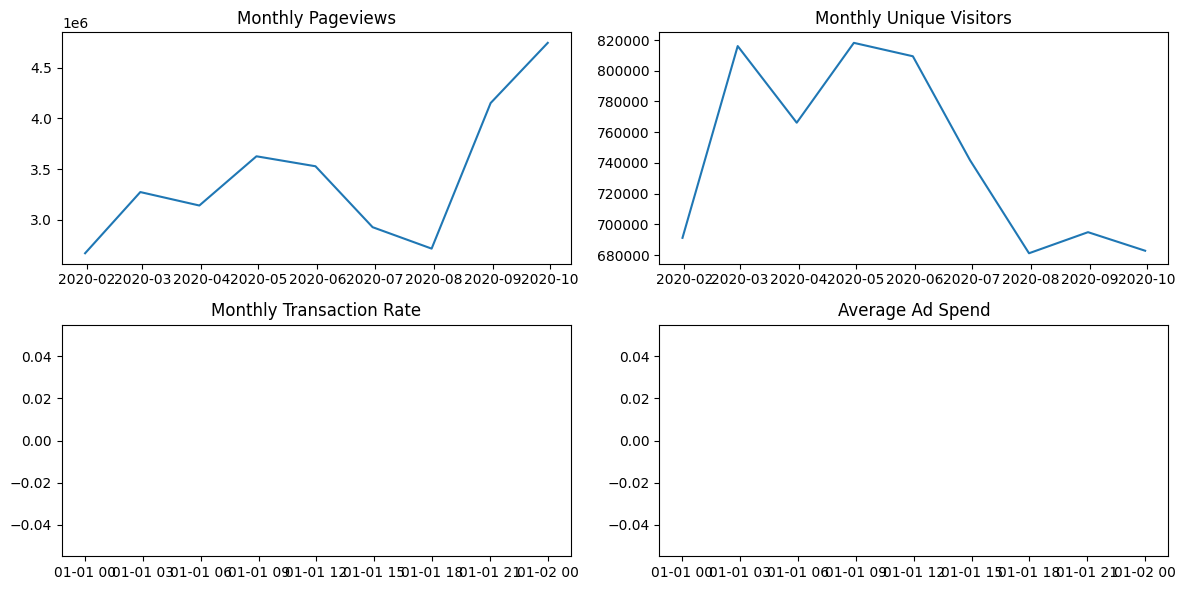

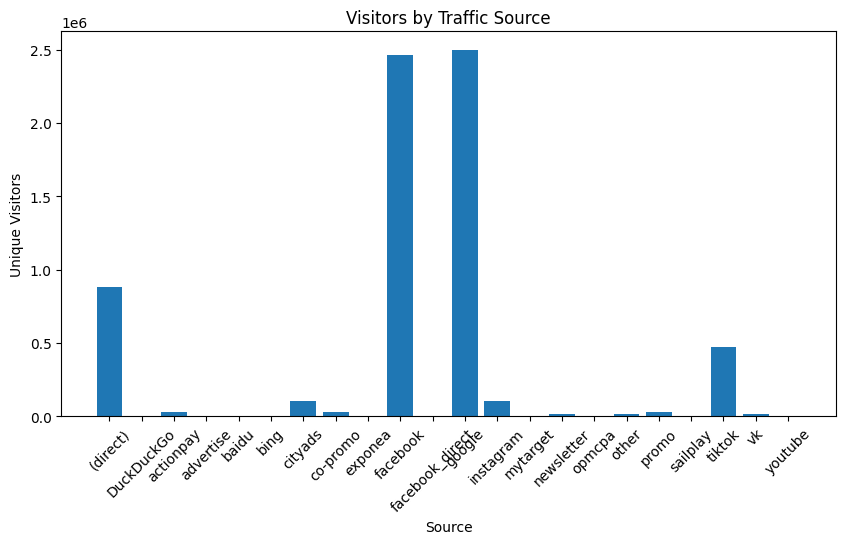

In [39]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime, timedelta

class WebAnalyticsInsightsAgent:
    def __init__(self, dataset_path):
        """
        Initialize the Web Analytics Insights Agent with a dataset.

        Args:
            dataset_path (str): Path to the web analytics CSV file
        """
        # Validate input and load dataset
        try:
            self.raw_data = pd.read_csv(dataset_path)
            self._preprocess_data()
        except Exception as e:
            raise ValueError(f"Error loading dataset: {e}")

        # Initialize visualization and report components
        self.insights = {}
        self.visualizations = {}

    def _preprocess_data(self):
        """
        Preprocess the web analytics dataset by:
        1. Cleaning column names
        2. Converting date columns
        3. Handling missing values
        4. Creating derived metrics
        """
        # Standardize column names
        self.raw_data.columns = [col.lower().replace(' ', '_') for col in self.raw_data.columns]

        # Convert date columns
        date_columns = [col for col in self.raw_data.columns if 'date' in col]
        for col in date_columns:
            self.raw_data[col] = pd.to_datetime(self.raw_data[col], errors='coerce')

        # Handle missing values
        if 'productclick' in self.raw_data.columns:  # Check if 'productclick' exists
            self.raw_data.fillna({
                'pageviews': 0,
                'visits': 0,
                'productclick': self.raw_data['productclick'].mean()  # Use correct column name
            }, inplace=True)
        else:
            print("Warning: 'productclick' column not found. Skipping NaN filling.")  # Print warning if column not found

        # Convert relevant columns to numeric, handling errors
        for col in ['revenue', 'ad_spend', 'checkout']:
            self.raw_data[col] = pd.to_numeric(self.raw_data[col], errors='coerce')

        # Create derived metrics
        self.raw_data['transaction_rate'] = self.raw_data['revenue'] / self.raw_data['productclick']
        self.raw_data['average_ad_spend'] = self.raw_data['ad_spend'] / self.raw_data['checkout']

    def generate_time_series_analysis(self):
        """
        Perform time series analysis of key web metrics.

        Returns:
            dict: Detailed time series insights
        """
        # Aggregate metrics by month
        monthly_metrics = self.raw_data.groupby(pd.Grouper(key='date', freq='M')).agg({
            'pageviews': 'sum',
            'visits': 'sum',
            'transaction_rate': 'mean',
            'average_ad_spend': 'mean'
        }).reset_index()

        # Trend analysis
        insights = {
            'pageviews_trend': self._calculate_trend(monthly_metrics['pageviews']),
            'visitors_trend': self._calculate_trend(monthly_metrics['visits']),
            'conversion_trend': self._calculate_trend(monthly_metrics['transaction_rate']),
            'average_ad_spend': self._calculate_trend(monthly_metrics['average_ad_spend']),
        }

        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(12, 6))
        plt.figure(figsize=(12, 6))
        plt.subplot(2, 2, 1)
        plt.plot(monthly_metrics['date'], monthly_metrics['pageviews'], label='Pageviews')
        plt.title('Monthly Pageviews')

        plt.subplot(2, 2, 2)
        plt.plot(monthly_metrics['date'], monthly_metrics['visits'], label='Unique Visitors')
        plt.title('Monthly Unique Visitors')

        plt.subplot(2, 2, 3)
        plt.plot(monthly_metrics['date'], monthly_metrics['transaction_rate'], label='Transaction Rate')
        plt.title('Monthly Transaction Rate')

        plt.subplot(2, 2, 4)
        plt.plot(monthly_metrics['date'], monthly_metrics['average_ad_spend'], label='Average Ad Spend')
        plt.title('Average Ad Spend')

        plt.tight_layout()
        self.visualizations['time_series'] = fig

        self.insights['time_series'] = insights
        return insights

    def _calculate_trend(self, series):
        """
        Calculate trend and statistical significance for a metric series.

        Args:
            series (pd.Series): Metric series to analyze

        Returns:
            dict: Trend analysis results
        """
        # Linear regression for trend
        x = np.arange(len(series))
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, series)

        return {
            'slope': slope,
            'direction': 'increasing' if slope > 0 else 'decreasing',
            'significance': 'significant' if p_value < 0.05 else 'not significant',
            'r_squared': r_value**2
        }

    def segment_traffic_sources(self):
        """
        Analyze and segment traffic sources.

        Returns:
            dict: Traffic source insights
        """
        # Group by traffic source
        source_metrics = self.raw_data.groupby('source').agg({
            'visits': 'sum',
            'transaction_rate': 'mean',
            'average_ad_spend': 'mean'
        }).reset_index()

        source_metrics['transaction_rate'] = source_metrics['transaction_rate'].fillna(0)

        # Visualization
        fig, ax = plt.subplots(figsize=(10,5))
        plt.figure(figsize=(10, 5))
        plt.bar(source_metrics['source'], source_metrics['visits'])
        plt.title('Visitors by Traffic Source')
        plt.xlabel('Source')
        plt.ylabel('Unique Visitors')
        plt.xticks(rotation=45)
        self.visualizations['traffic_sources'] = fig

        # Extract top and bottom sources
        top_sources = source_metrics.nlargest(3, 'visits')
        bottom_sources = source_metrics.nsmallest(3, 'visits')

        insights = {
            'top_sources': top_sources.to_dict('records'),
            'bottom_sources': bottom_sources.to_dict('records'),
            'best_converting_source': source_metrics.loc[source_metrics['transaction_rate'].idxmax(), 'source']
        }

        self.insights['traffic_sources'] = insights
        return insights

    def generate_comprehensive_report(self):
        """
        Generate a comprehensive web analytics report.

        Returns:
            str: Formatted report with key insights
        """
        # Run all analyses
        self.generate_time_series_analysis()
        self.segment_traffic_sources()

        report = f"""
        WEB ANALYTICS COMPREHENSIVE REPORT
        Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

        1. TIME SERIES TRENDS
        ---------------------
        Pageviews Trend: {self.insights['time_series']['pageviews_trend']['direction']}
        (Significance: {self.insights['time_series']['pageviews_trend']['significance']})

        2. TRAFFIC SOURCE ANALYSIS
        --------------------------
        Top Traffic Sources:
        {', '.join([source['source'] for source in self.insights['traffic_sources']['top_sources']])}

        Best Converting Source: {self.insights['traffic_sources']['best_converting_source']}

        RECOMMENDATIONS
        ---------------
        1. Focus marketing efforts on {self.insights['traffic_sources']['best_converting_source']}
        2. Investigate strategies to improve {self.insights['time_series']['pageviews_trend']['direction']} trend
        """

        return report

    def save_visualizations(self, output_dir='./analytics_reports'):
        """
        Save generated visualizations to specified directory.

        Args:
            output_dir (str): Directory to save visualizations
        """
        import os
        os.makedirs(output_dir, exist_ok=True)

        for name, fig in self.visualizations.items():
            fig.savefig(f"{output_dir}/{name}_visualization.png")
            plt.close(fig)  # Close to free up memory

# Example Usage
def main():
    # Demonstrate how to use the WebAnalyticsInsightsAgent
    analytics_agent = WebAnalyticsInsightsAgent('https://raw.githubusercontent.com/jaydiaz2012/AI_First_Day_6_AI_Swarm/refs/heads/main/ai%20first%20sales%20data%20-%20sales%20(1).csv')

    # Generate report and visualizations
    report = analytics_agent.generate_comprehensive_report()
    analytics_agent.save_visualizations()

    print(report)

if __name__ == "__main__":
    main()